# <span style='color:blue'> LAB2: </span>
# <span style='color:blue'> PYTORCH INTRODUCTION </span>

# <span style='color:red'> Part 1: Python as Deep Learning Platform -----------------------------------------------------</span>

### 1.1 - Verify PyTorch Installation

In [2]:
# Import necessary packages

import numpy as np
import torch

In [3]:
# Define a random torch tensor of shape (5, 3)

x = torch.rand(5, 3)
print(x)

tensor([[0.7668, 0.9273, 0.1716],
        [0.6974, 0.0278, 0.0973],
        [0.0628, 0.4841, 0.5969],
        [0.4445, 0.3112, 0.8397],
        [0.0299, 0.4089, 0.0936]])


In [4]:
# This lines ensures PyTorch can communicate with your GPU for hardware acceleration

torch.cuda.is_available()

False

# <span style='color:red'> Part 2: Neural Network Workflow in PyTorch (Simple Linear Regression) ----------</span>

### 2.1 - Prepare Data

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Generate training data for x and y

x_train = np.arange(11, dtype = np.float32)
x_train = x_train[:, np.newaxis] # [:, np.nexaxis] re-orient the x_train so that it's in vertical orientation

y_train = (2 * x_train) + 1

In [7]:
print(x_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [8]:
print(y_train)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


### 2.2 - Define Model

In [9]:
# A neural network model in PyTorch is a class 

class linearRegression(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim): # Initializes the model with a linear layer with input/output dimension
        
        super(linearRegression, self).__init__() # This line allows us to use attributes/methods from torch.nn.Module
        
        self.linear = torch.nn.Linear(input_dim, output_dim) # Define a single linear layer with input/output dimensions

    def forward(self, x): # This function describes the information flow within the network from input -> output
        
        out = self.linear(x) # We only have a single layer so the network output = output of the linear layer 
        
        return out

### 2.3 - Select Hyperparameters

In [10]:
# Initialize our neural network model with input and output dimensions
model = linearRegression(input_dim = 1, output_dim = 1)

# Define the learning rate and epoch (# of iterations)
learning_rate = 0.01 
epochs = 100

# Define loss function and optimizer
loss_func = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Run this line if you have PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

### 2.4 - Identify Tracked Values

In [11]:
# Define a list or numpy array placeholder to keep track of our training loss

train_loss_list = []

### 2.5 - Train Model

In [12]:
# Convert our dataset (inputs and targets) into torch tensors

if torch.cuda.is_available():
    inputs = torch.from_numpy(x_train).cuda() # If using GPU version, transfer the dataset to GPU memory
    targets = torch.from_numpy(y_train).cuda()
else:
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

# TRAINING LOOP-------------------------------------------------------------------------

for epoch in range(epochs): # For each epoch (i.e. single pass on the training dataset)

    optimizer.zero_grad() # Empty the gradient buffer so each learning event per epoch is separate

    outputs = model(inputs) # Forward pass the inputs through the network to produce outputs 

    loss = loss_func(outputs, targets) # Compute the loss via comparing the output with expected targets
    
    train_loss_list.append(loss.item()) # Save the loss value to train_loss_list we defined
    
    loss.backward() # Compute how much changes to be made to weights/biases

    optimizer.step() # Update the weights/biases according to learning rate

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 323.3556823730469
epoch 1, loss 26.577543258666992
epoch 2, loss 2.3680343627929688
epoch 3, loss 0.39110419154167175
epoch 4, loss 0.22764205932617188
epoch 5, loss 0.21212314069271088
epoch 6, loss 0.20869582891464233
epoch 7, loss 0.20627886056900024
epoch 8, loss 0.20396842062473297
epoch 9, loss 0.20169030129909515
epoch 10, loss 0.1994379162788391
epoch 11, loss 0.19721084833145142
epoch 12, loss 0.19500881433486938
epoch 13, loss 0.1928310990333557
epoch 14, loss 0.19067777693271637
epoch 15, loss 0.1885484755039215
epoch 16, loss 0.1864430010318756
epoch 17, loss 0.1843610256910324
epoch 18, loss 0.1823022961616516
epoch 19, loss 0.18026648461818695
epoch 20, loss 0.17825354635715485
epoch 21, loss 0.17626290023326874
epoch 22, loss 0.17429472506046295
epoch 23, loss 0.1723482310771942
epoch 24, loss 0.1704237163066864
epoch 25, loss 0.16852065920829773
epoch 26, loss 0.16663858294487
epoch 27, loss 0.1647779792547226
epoch 28, loss 0.16293777525424957
epoch 29, l

### 2.6 - Visualization and Evaluation

In [13]:
with torch.no_grad(): # Telling PyTorch we aren't passing inputs to the model for training purpose, which requires gradient
    
    if torch.cuda.is_available(): # If you are using GPU version
        
        # 1. Convert x_train (np.array) -> torch tensors with torch.from_numpy()
        # 2. Transfer x_train to GPU using .cuda()
        # 3. Feed forward x_train to model to obtain the output using model()
        # 4. Since the model lives in GPU, we should bring back the model output to CPU with .cpu()
        # 5. Finally convert the torch tensor to numpy with .numpy()
        predicted = model(torch.from_numpy(x_train).cuda()).cpu().numpy() 
        
    else:
        
        # With CPU version, steps 2,3,4 above is not needed
        predicted = model(torch.from_numpy(x_train)).numpy()
    
    # Print the predicted outputs - i.e., y-values and weight and biases in the trained neural network
    print(predicted) 
    print("a: " + str(model.linear.weight.cpu().numpy()), "b: " + str(model.linear.bias.cpu().numpy()))

[[ 0.4959906]
 [ 2.5685725]
 [ 4.641155 ]
 [ 6.7137365]
 [ 8.786319 ]
 [10.858901 ]
 [12.931482 ]
 [15.004065 ]
 [17.076647 ]
 [19.14923  ]
 [21.221811 ]]
a: [[2.072582]] b: [0.4959906]


Text(0, 0.5, 'y')

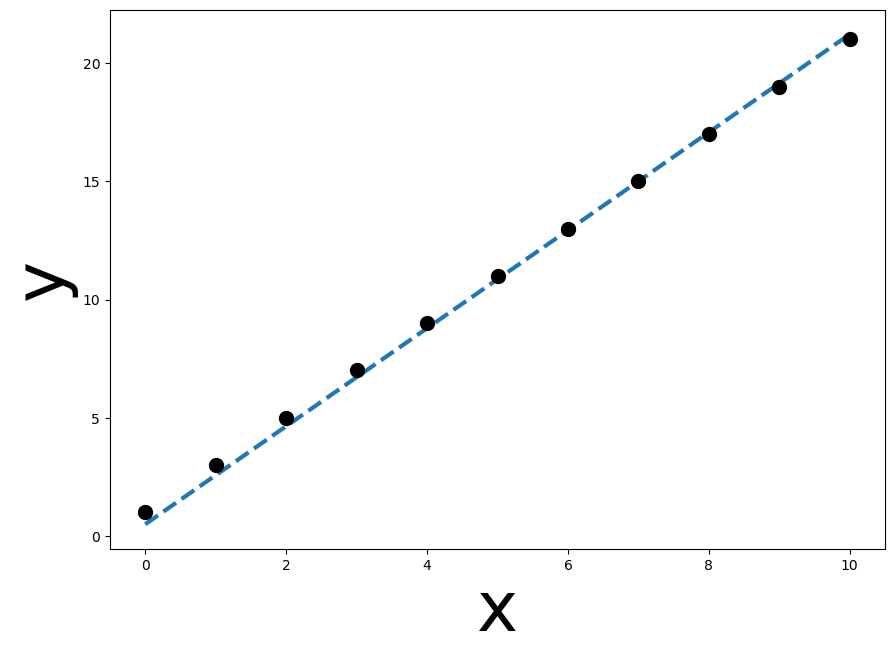

In [14]:
# Plot the predicted-y (blue line) vs expected targets (black dots)

plt.figure(figsize = (10, 7))

plt.plot(predicted, '--', linewidth = 3)
plt.plot(x_train, y_train, 'o', color = 'black', markersize = 10)
plt.xlabel('x', fontsize = 50)
plt.ylabel('y', fontsize = 50)

# <span style='color:red'> Part 3: Python Concepts for PyTorch ---------------------------------------------------------</span>

### 3.1 - Python Classes

In [15]:
class Pokemon():
    def __init__(self, Name, Type, Health): # Define attributes for the Pokemon object
        self.Name = Name
        self.Type = Type 
        self.Health = Health
        
    # Define methods for the Pokemon object
    
    def whats_your_name(self): # Your method can directly use the attributes defined in __init__
        print("My name is " + self.Name + "!")

    def attack(self):
        print("Electric attack! Zap!!")

    def dodge(self):
        print("Pikachu Dodge!")

    def evolve(self):
        print("Evolving to Raichu!!")

In [16]:
pk1 = Pokemon(Name = "Pikachu", Type = "Electric", Health = 70)

In [17]:
pk1.Name

'Pikachu'

In [18]:
pk1.whats_your_name()

My name is Pikachu!


In [19]:
pk1.attack()

Electric attack! Zap!!


### 3.2 - PyTorch Tensors vs Numpy Arrays

In [20]:
# Defining a numpy array
array1 = np.array([1,2,3,4]) 
print(array1, type(array1))

[1 2 3 4] <class 'numpy.ndarray'>


In [21]:
# Defining a torch tensor
tensor1 = torch.tensor([1,2,3,4])
print(tensor1, type(tensor1))

tensor([1, 2, 3, 4]) <class 'torch.Tensor'>


In [22]:
# Converting numpy array to torch tensor
array1_torch = torch.from_numpy(array1)
print(array1_torch, type(array1_torch))

tensor([1, 2, 3, 4]) <class 'torch.Tensor'>


In [23]:
# Converting torch tensor to numpy array
tensor1_numpy = tensor1.numpy()
print(tensor1_numpy, type(tensor1_numpy))

[1 2 3 4] <class 'numpy.ndarray'>


### 3.3 - Handling Torch Tensors

In [24]:
# Transferring your torch tensor to CPU
tensor1_cpu = tensor1.cpu()
print(tensor1_cpu.device)

cpu


In [25]:
# Transferring your torch tensor to GPU
tensor1_gpu = tensor1.cuda()
print(tensor1_gpu.device)

AssertionError: Torch not compiled with CUDA enabled